In [1]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [2]:
folder = "experiment13full/"

# HUG
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_JOINT_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
RMSE_HUG      = load(folder + "RMSE_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG    = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG    = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG     = load(folder + "A_HOP_HUG.npy")
N_UNIQUE_HUG  = load(folder + "N_UNIQUE_HUG.npy")
THETA_AC_HUG  = load(folder + "THETA_AC_HUG.npy")
U_AC_HUG      = load(folder + "U_AC_HUG.npy")

# THUG
THETA_ESS_THUG = load(folder + "THETA_ESS_THUG.npy")
U_ESS_THUG     = load(folder + "U_ESS_THUG.npy")
ESS_THUG       = load(folder + "ESS_JOINT_THUG.npy")
A_THUG         = load(folder + "A_THUG.npy")
RMSE_THUG      = load(folder + "RMSE_THUG.npy")
EJSD_THUG      = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG    = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG    = load(folder + "T_EJSD_THUG.npy")
A_HOP_THUG     = load(folder + "A_HOP_THUG.npy")
N_UNIQUE_THUG  = load(folder + "N_UNIQUE_THUG.npy")
THETA_AC_THUG  = load(folder + "THETA_AC_THUG.npy")
U_AC_THUG      = load(folder + "U_AC_THUG.npy")

# COMMON
EPSILONS       = load(folder + "EPSILONS.npy")
ALPHAS         = load(folder + "ALPHAS.npy")
TS             = load(folder + "TS.npy")
time           = load(folder + "TIME.npy")

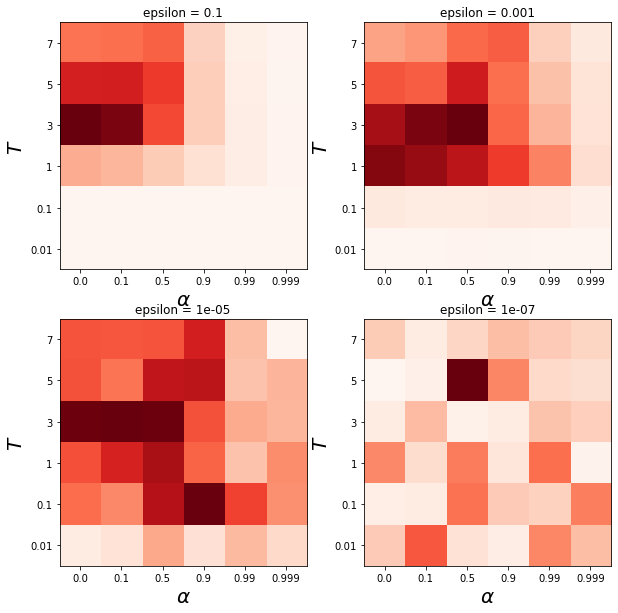

In [26]:
data_list = [
    np.hstack((THETA_ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), THETA_ESS_THUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, 5.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, 5.5, 1));
    ax[i //2, i % 2].set_xticklabels(['0.0', '0.1', '0.5', '0.9', '0.99', '0.999'])
    ax[i //2, i % 2].set_yticklabels(['7', '5', '3', '1', '0.1', '0.01'])
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
plt.show()